# DATA LOADING & CLEANING

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('final_amazon_reviews.csv')

In [3]:
df.isnull().sum()

Unnamed: 0               0
brand                    0
manufacturer             0
reviews.doRecommend    594
reviews.rating          33
reviews.text             1
reviews.title            5
dtype: int64

In [4]:
df.shape

(35631, 7)

In [5]:
df.dropna(subset=['reviews.doRecommend','reviews.rating','reviews.text','reviews.title'],inplace=True)

In [6]:
df.isnull().sum()

Unnamed: 0             0
brand                  0
manufacturer           0
reviews.doRecommend    0
reviews.rating         0
reviews.text           0
reviews.title          0
dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df

,brand,manufacturer,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,Amazon,Amazon,True,5.0,This product so far has not disappointed. My c...,Kindle
1,Amazon,Amazon,True,5.0,great for beginner or experienced person. Boug...,very fast
2,Amazon,Amazon,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,Amazon,Amazon,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,Amazon,Amazon,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids
...,...,...,...,...,...,...
35626,Amazon,Amazon,True,3.0,Unable to download the Instagram app. which st...,The camera is awful!
35627,Amazon,Amazon,True,5.0,"Pros: 5 Ghz wifi, supports expansion cardsCons...","Very good for reading, email, internet"
35628,Amazon,Amazon,True,5.0,Bought it for my little grandson he likes game...,very good tablet
35629,Amazon,Amazon,True,5.0,I just like reading amd playing games on it..B...,Works great


# TEXT PRE-PROCESSING

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


False

In [10]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocess_text_adjusted(text):
    # Lowercasing
    text = text.lower()
    
    # Remove special characters and digits, punctuation
    text = ''.join(char for char in text if char.isalnum() or char.isspace() or char in ['!', '?', ','])
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the processed words back into a sentence
    processed_text = ' '.join(words)
    
    return processed_text
df['reviews.text_adjusted'] = df['reviews.text'].apply(preprocess_text_adjusted)
print(df)

        brand manufacturer reviews.doRecommend  reviews.rating  \
0      Amazon       Amazon                True             5.0   
1      Amazon       Amazon                True             5.0   
2      Amazon       Amazon                True             5.0   
3      Amazon       Amazon                True             4.0   
4      Amazon       Amazon                True             5.0   
...       ...          ...                 ...             ...   
35626  Amazon       Amazon                True             3.0   
35627  Amazon       Amazon                True             5.0   
35628  Amazon       Amazon                True             5.0   
35629  Amazon       Amazon                True             5.0   
35630  Amazon       Amazon                True             4.0   

                                            reviews.text  \
0      This product so far has not disappointed. My c...   
1      great for beginner or experienced person. Boug...   
2      Inexpensive tablet f

In [11]:
from textblob import TextBlob
df['sentiment'] = df['reviews.text_adjusted'].apply(lambda text: 'positive' if TextBlob(text).sentiment.polarity > 0.1 else ('negative' if TextBlob(text).sentiment.polarity < -0.1 else 'neutral'))

In [12]:
df['sentiment'].value_counts()

positive    29186
neutral      4063
negative     1784
Name: sentiment, dtype: int64

# EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

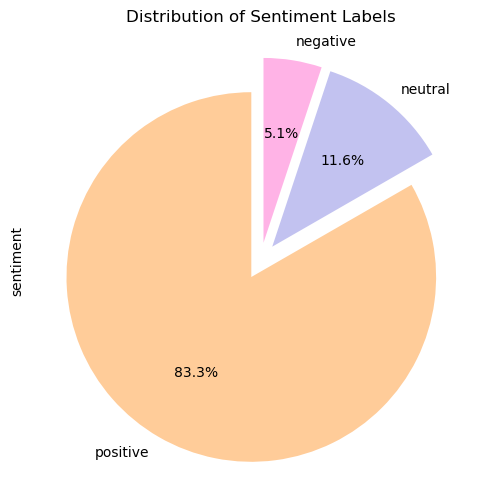

In [14]:
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FFCC99', '#c2c2f0', '#ffb3e6'], explode=(0.1,0.1,0.1), startangle=90)
plt.title('Distribution of Sentiment Labels')
plt.show()

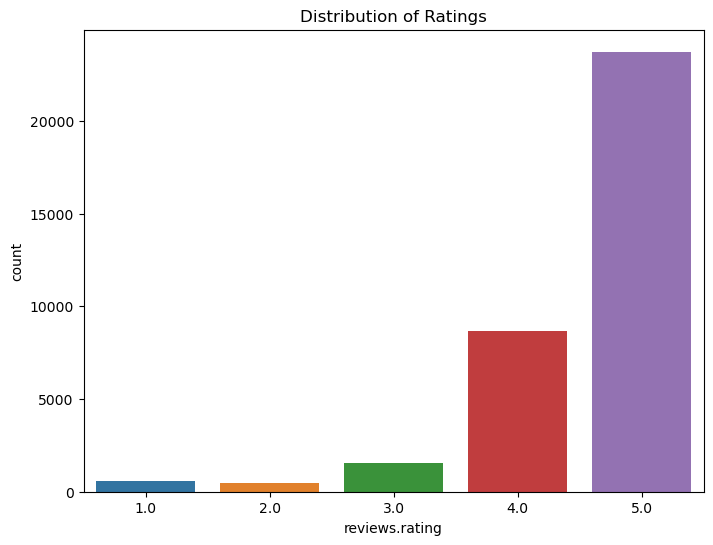

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

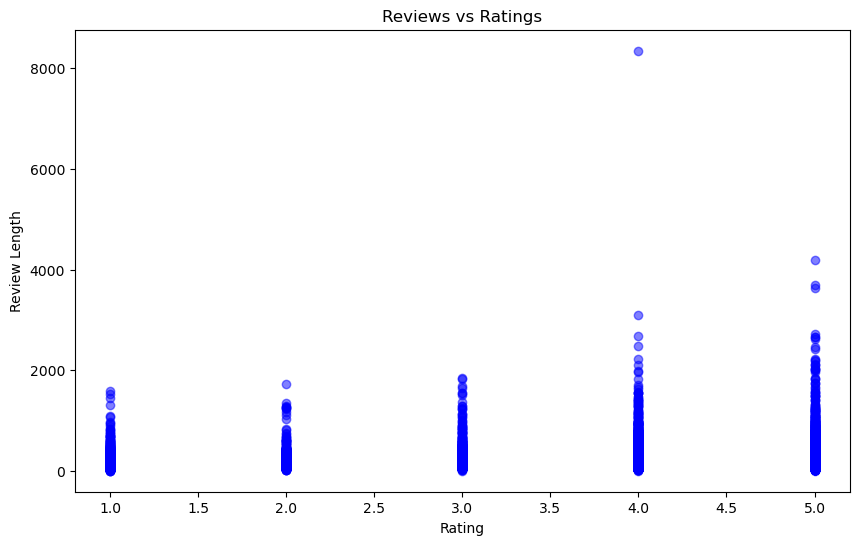

In [17]:
df['review_length'] = df['reviews.text'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews.rating'], df['review_length'], alpha=0.5, color='blue')
plt.title('Reviews vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

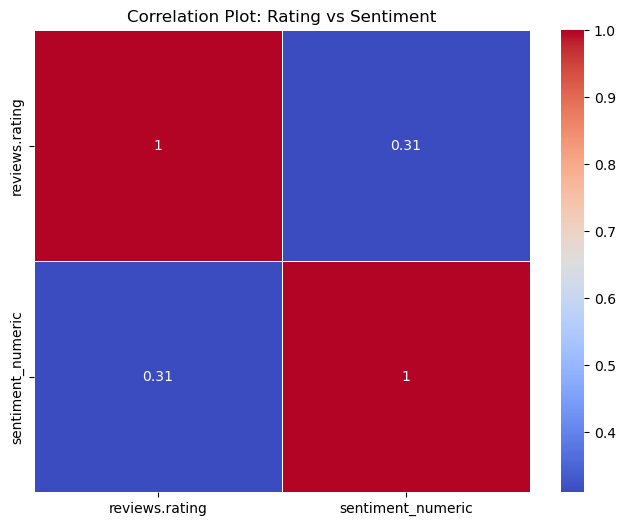

In [18]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

#  correlation matrix
correlation_matrix = df[['reviews.rating', 'sentiment_numeric']].corr()

#  heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot: Rating vs Sentiment')
plt.show()

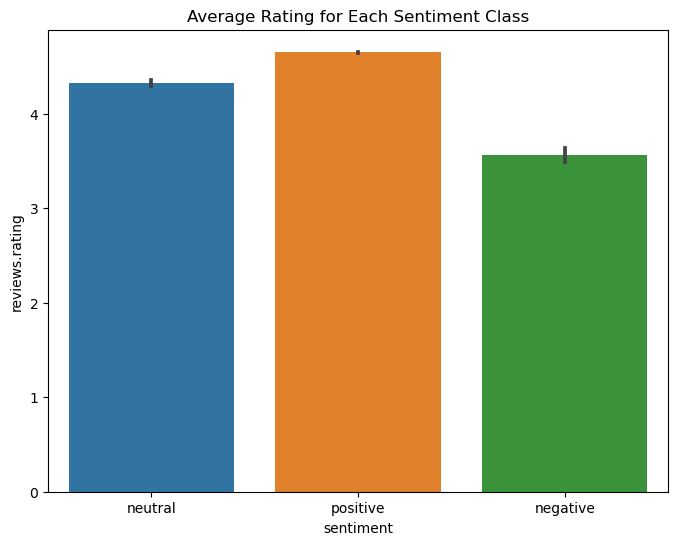

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='reviews.rating', data=df)
plt.title('Average Rating for Each Sentiment Class')
plt.show()


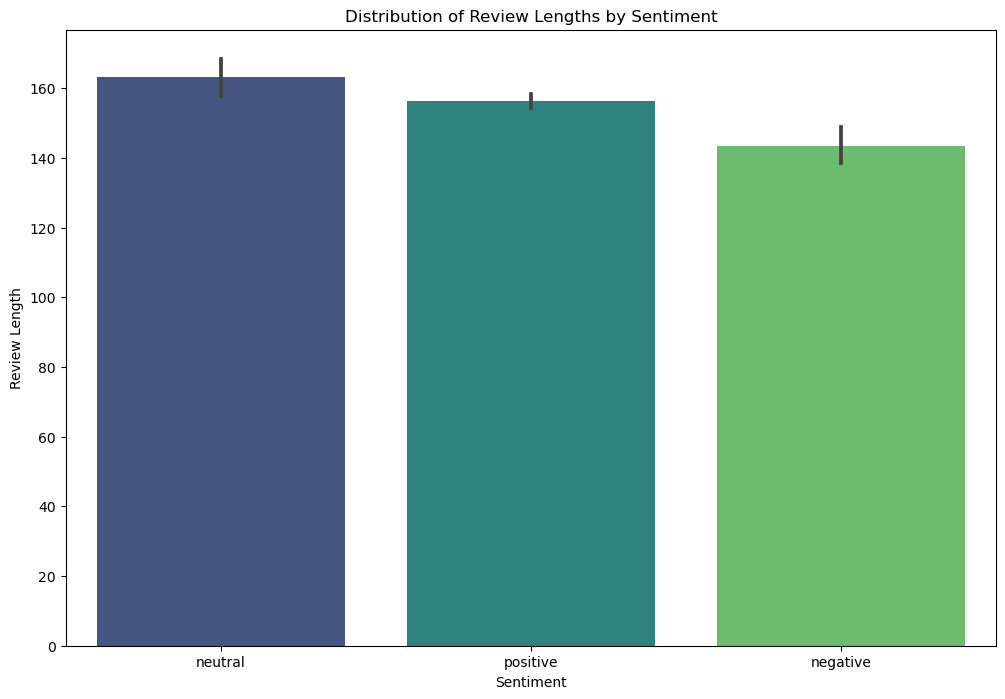

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='review_length', data=df, palette='viridis')
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

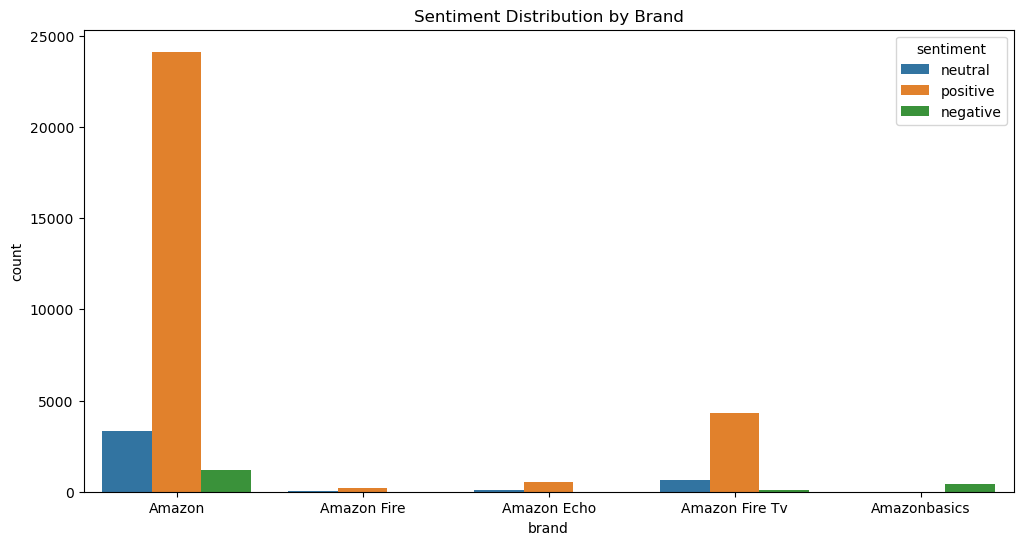

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Brand')
plt.show()

In [22]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def get_bigrams(sentiment_category):
    selected_reviews = df[df['sentiment'] == sentiment_category]['reviews.text_adjusted']
    text = ' '.join(selected_reviews)
    
    # Tokenizing the text
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Removing non-alphanumeric characters
    lemmatized_tokens = [token for token in lemmatized_tokens if token.isalnum() or token.isspace()]

    # Removing single characters
    lemmatized_tokens = [token for token in lemmatized_tokens if len(token) > 1]

    # Extracting bigrams
    sentiment_bigrams = list(bigrams(lemmatized_tokens))

    return sentiment_bigrams

positive_bigrams = get_bigrams('positive')
negative_bigrams = get_bigrams('negative')
neutral_bigrams = get_bigrams('neutral')
print("Positive Review Bigrams:", positive_bigrams[:10])
print("Negative Review Bigrams:", negative_bigrams[:10])
print("Neutral Review Bigrams:", neutral_bigrams[:10])

Positive Review Bigrams: [('great', 'beginner'), ('beginner', 'experienced'), ('experienced', 'person'), ('person', 'bought'), ('bought', 'gift'), ('gift', 'love'), ('love', 'inexpensive'), ('inexpensive', 'tablet'), ('tablet', 'use'), ('use', 'learn')]
Negative Review Bigrams: [('really', 'like'), ('like', 'tablet'), ('tablet', 'would'), ('would', 'given'), ('given', 'star'), ('star', 'sometimes'), ('sometimes', 'push'), ('push', 'start'), ('start', 'several'), ('several', 'time')]
Neutral Review Bigrams: [('product', 'far'), ('far', 'disappointed'), ('disappointed', 'child'), ('child', 'love'), ('love', 'use'), ('use', 'like'), ('like', 'ability'), ('ability', 'monitor'), ('monitor', 'control'), ('control', 'content')]


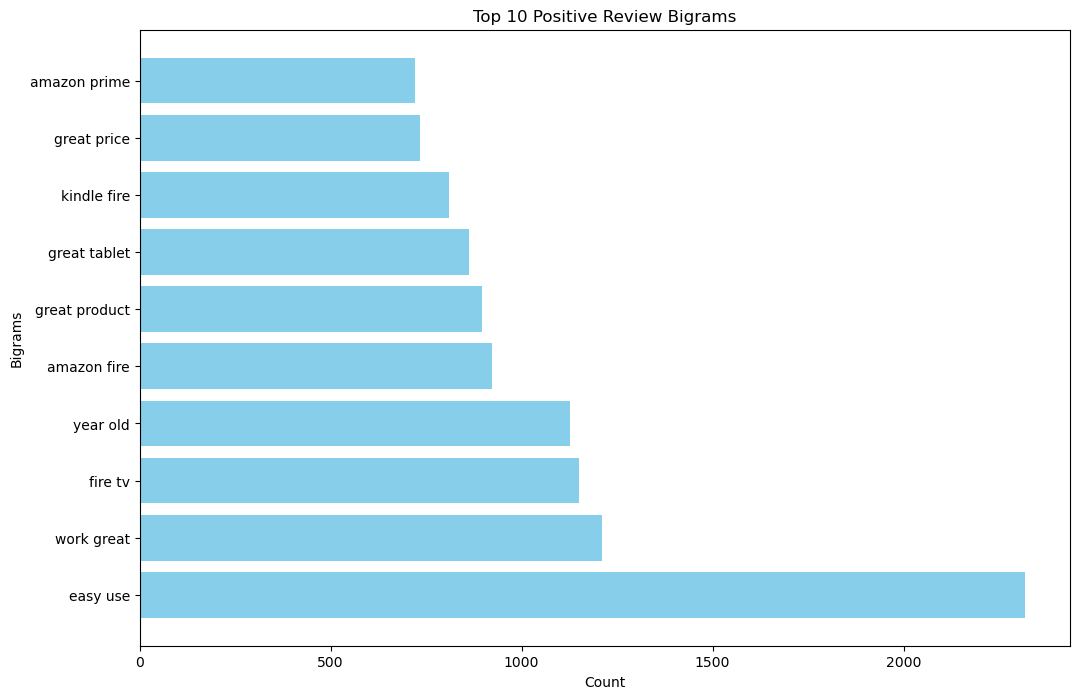

In [23]:
from collections import Counter

# Count the occurrences of each bigram in each sentiment category
positive_bigram_counts = Counter(positive_bigrams)
negative_bigram_counts = Counter(negative_bigrams)
neutral_bigram_counts = Counter(neutral_bigrams)

# Get the top N bigrams for each sentiment category
num_top_bigrams = 10
top_positive_bigrams = positive_bigram_counts.most_common(num_top_bigrams)
top_negative_bigrams = negative_bigram_counts.most_common(num_top_bigrams)
top_neutral_bigrams = neutral_bigram_counts.most_common(num_top_bigrams)

# Function to plot bigrams
def plot_bigrams(top_bigrams, title):
    bigrams, counts = zip(*top_bigrams)
    bigrams = [' '.join(bigram) for bigram in bigrams]  # Join the bigrams into a single string
    plt.figure(figsize=(12, 8))
    plt.barh(bigrams, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Bigrams')
    plt.show()

# Plot the top N bigrams for each sentiment category
plot_bigrams(top_positive_bigrams, 'Top 10 Positive Review Bigrams')


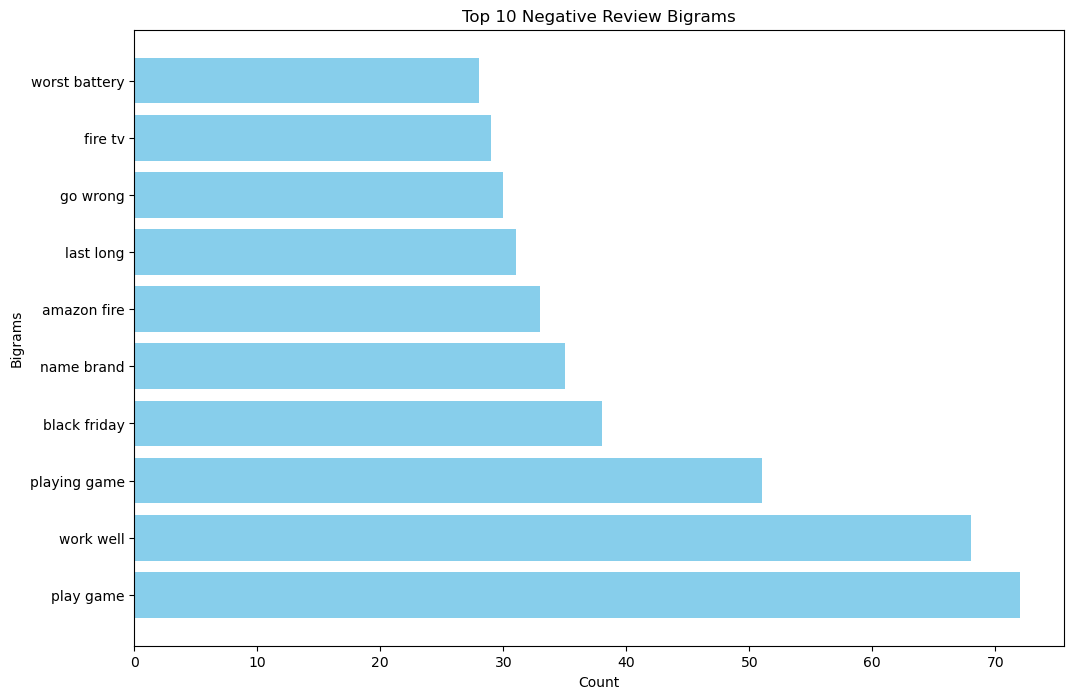

In [24]:
plot_bigrams(top_negative_bigrams, 'Top 10 Negative Review Bigrams')


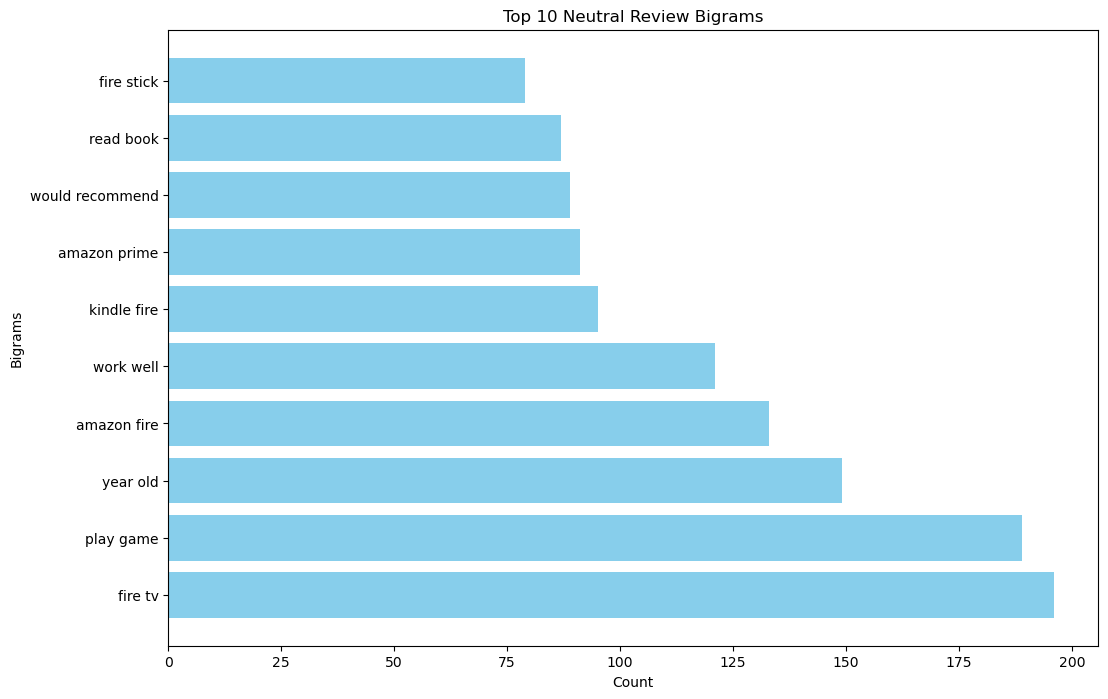

In [25]:
plot_bigrams(top_neutral_bigrams, 'Top 10 Neutral Review Bigrams')

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


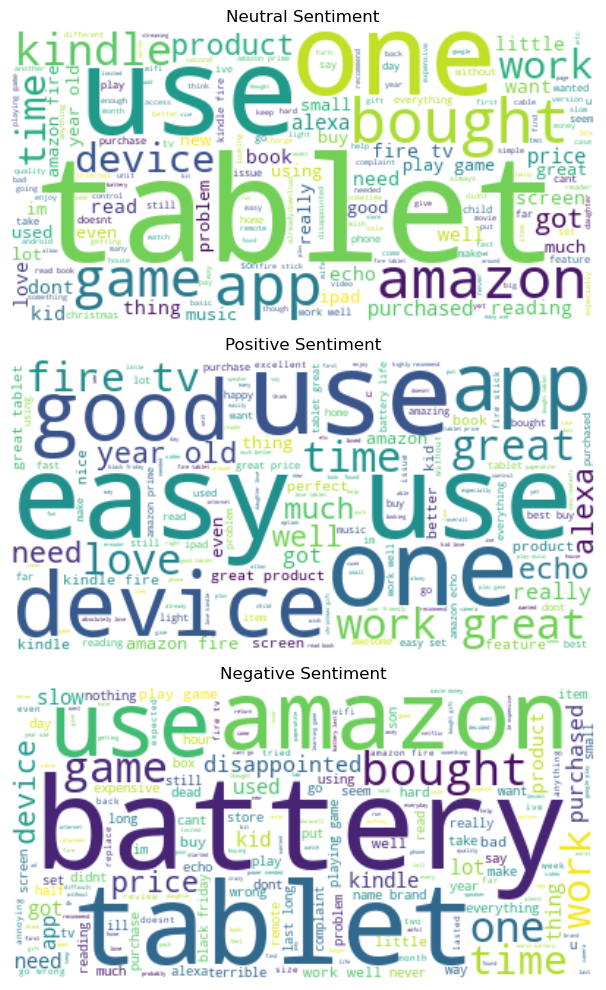

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(sentiment, ax):
    # Combining reviews for the specified sentiment into a single text
    text = ' '.join(df[df['sentiment'] == sentiment]['reviews.text_adjusted'])

    # Generating the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

    # Ploting the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Turn off axis labels
    ax.set_title(f'{sentiment.capitalize()} Sentiment')

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Generating word clouds for each sentiment category
sentiments = df['sentiment'].unique()
for i, sentiment in enumerate(sentiments):
    generate_wordcloud(sentiment, axes[i])

plt.tight_layout()
plt.show()

# PREDICTION MODEL

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

text_data = df['reviews.text_adjusted']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# train test split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.3, random_state=7)

# fitting the model

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# model evaluation

accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:", classification_report_result)

C:\Users\GANESH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9008563273073263
Classification Report:               precision    recall  f1-score   support

    negative       0.90      0.47      0.62       535
     neutral       0.64      0.39      0.48      1191
    positive       0.92      1.00      0.96      8784

    accuracy                           0.90     10510
   macro avg       0.82      0.62      0.69     10510
weighted avg       0.89      0.90      0.89     10510



In [29]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df['reviews.text_adjusted']
y = df['sentiment']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=7)

# Oversampling the imblanced class using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=7)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# fitting the model with resampled x_train and y_train
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:", classification_report_result)

C:\Users\GANESH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.90209324452902
Classification Report:               precision    recall  f1-score   support

    negative       0.70      0.78      0.74       535
     neutral       0.56      0.80      0.66      1191
    positive       0.99      0.92      0.95      8784

    accuracy                           0.90     10510
   macro avg       0.75      0.84      0.78     10510
weighted avg       0.92      0.90      0.91     10510



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

# train_test_Split
X_train, X_test, y_train, y_test = train_test_split(df['reviews.text_adjusted'], df['sentiment'], test_size=0.3, random_state=7)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# pipeline of RandomOverSampler  and GradientBoostingClassifier
model = make_pipeline(RandomOverSampler(), GradientBoostingClassifier(random_state=7))

# fit the model
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.8182683158896289
Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.69      0.65       535
     neutral       0.37      0.74      0.49      1191
    positive       0.98      0.84      0.90      8784

    accuracy                           0.82     10510
   macro avg       0.65      0.76      0.68     10510
weighted avg       0.89      0.82      0.84     10510



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# train_test_Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.3, random_state=7)

# Applying random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# fit the model
rf_model.fit(X_resampled, y_resampled)
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Random Forest Classifier Results:
Accuracy: 0.8961941008563273
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.64      0.76       535
     neutral       0.68      0.33      0.45      1191
    positive       0.91      0.99      0.95      8784

    accuracy                           0.90     10510
   macro avg       0.84      0.65      0.72     10510
weighted avg       0.88      0.90      0.88     10510



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

#  train_test_Split
X_train, X_test, y_train, y_test = train_test_split(df['reviews.text_adjusted'], df['sentiment'], test_size=0.3, random_state=7)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# pipeline of RandomOverSampler  and Naive Bayes
model = make_pipeline(RandomOverSampler(), MultinomialNB())

# fit the model
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.8114176974310181
Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.67      0.59       535
     neutral       0.34      0.56      0.43      1191
    positive       0.95      0.85      0.90      8784

    accuracy                           0.81     10510
   macro avg       0.61      0.70      0.64     10510
weighted avg       0.86      0.81      0.83     10510



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

# train_test_Split 
X_train, X_test, y_train, y_test = train_test_split(df['reviews.text_adjusted'], df['sentiment'], test_size=0.3, random_state=7)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#  pipeline of RandomOverSampler and SVM
model = make_pipeline(RandomOverSampler(), SVC())

# fit the model 
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.9310180780209324
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.65      0.77       535
     neutral       0.73      0.64      0.68      1191
    positive       0.95      0.99      0.97      8784

    accuracy                           0.93     10510
   macro avg       0.87      0.76      0.81     10510
weighted avg       0.93      0.93      0.93     10510

